In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate


# Generating Really Easy Simple integrals

In [67]:
# Randomly generate a poynomial
def generate_poly(degree):
    poly = np.zeros(10)
    degrees = np.zeros(10)
    for i in range(degree-1):
      poly[i+1] = np.random.uniform(0, 10)
      degrees[i+1] = np.random.randint(2, 20)
    return poly, degrees

# define an integral of 1 over the polynomial over the interval [0,a] where a is randomly generated, and plot it
def integral(degree):
    poly, degrees = generate_poly(degree)
    a = np.random.uniform(0, 100)
    eps_list=10.**np.linspace(-6,10,100)
    x=np.linspace(0,5,1001)
    I_eps=[integrate.quad(lambda x: 1/(eps+poly[1]*x**degrees[1] + poly[2]*x**degrees[2] +poly[3]*x**degrees[3] + poly[4]*x**degrees[4]+poly[5]*x**degrees[5]+poly[6]*x**degrees[6] + poly[7]*x**degrees[7] + poly[8]*x**degrees[8]+ poly[9]*x**degrees[9]), 0, a)[0] for eps in eps_list]

    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(15,10))
    plt.loglog(eps_list,np.abs(I_eps),'o',mfc='none',markersize=10,label='numerical')
    plt.xlabel('$\epsilon$')
    plt.ylabel('Integral')
    plt.legend(loc='best');
    return poly, degrees


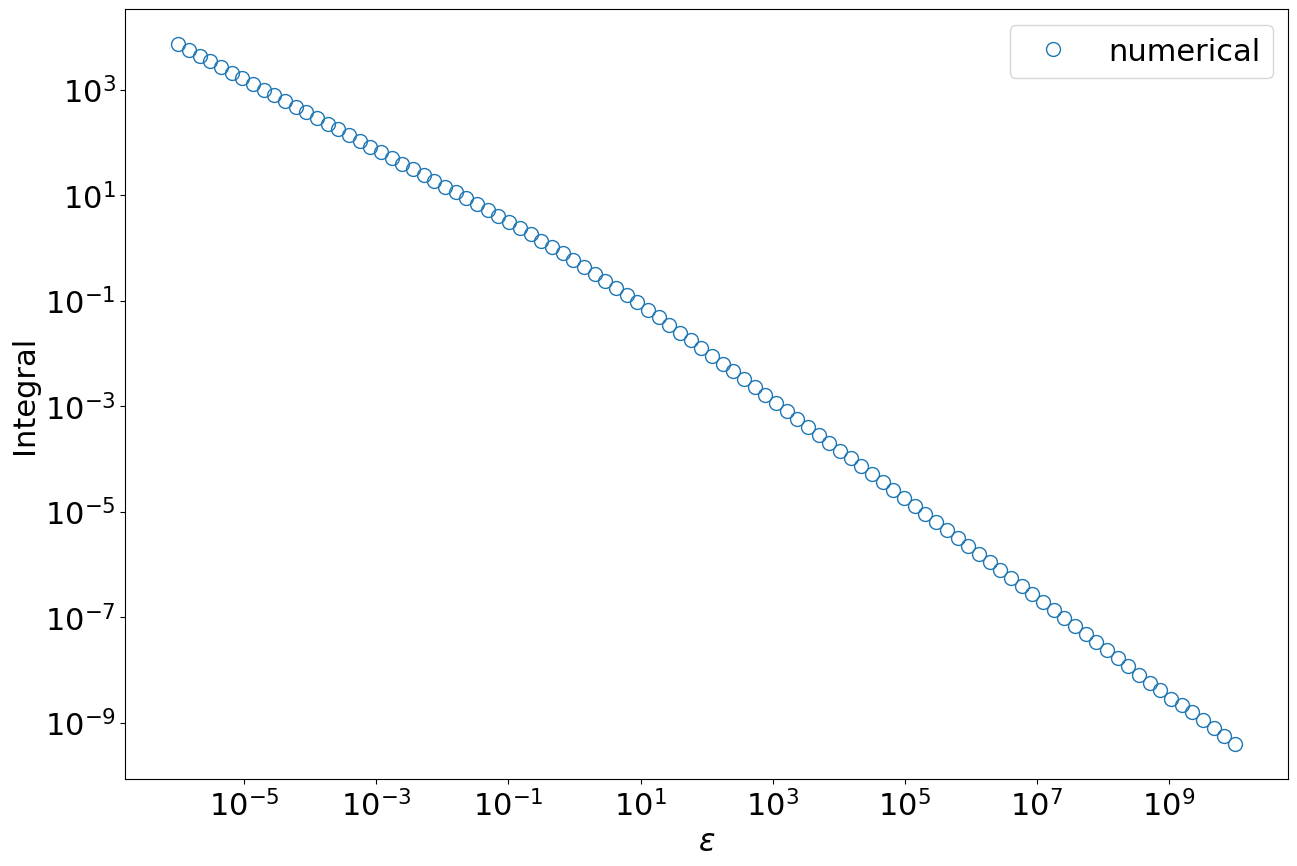

In [68]:
poly, degrees = integral(7)

# Finding Approximate Solutions to these simple integrals

In [26]:
import sympy as sy

ep = sy.symbols('\epsilon')
x = sy.symbols('x')
degrees
eq = ep+poly[1]*x**degrees[1] + poly[2]*x**degrees[2] +poly[3]*x**degrees[3] + poly[4]*x**degrees[4]+poly[5]*x**degrees[5]+poly[6]*x**degrees[6] + poly[7]*x**degrees[7] + poly[8]*x**degrees[8]+ poly[9]*x**degrees[9]

In [27]:
eq

\epsilon + 3.71049354653167*x**7.0 + 6.24878202819589*x**9.0 + 3.09336888649463*x**11.0 + 2.04706513980709*x**16.0 + 5.73013555672307*x**17.0 + 3.10999333658077*x**18.0

### Small $\epsilon$

Find the small number of an array that is not zero


In [32]:
def find_smallest(array):
    tempval = []
    tempindex = []
    for i in range(len(array)):
        if array[i] != 0:
            tempval.append(array[i])
            tempindex.append(i)
    min = np.min(tempval)
    i = np.argmin(tempval)
    return min, tempindex[i]

### Large $\epsilon$

In [39]:
def find_largest(array):
    tempval = []
    tempindex = []
    for i in range(len(array)):
        if array[i] != 0:
            tempval.append(array[i])
            tempindex.append(i)
    min = np.max(tempval)
    i = np.argmax(tempval)
    return min, tempindex[i]

### Combining them all together

In [69]:
def solve_simple_integral(degree):
    poly, degrees = generate_poly(degree)
    a = np.random.uniform(0, 100)
    eps_list=10.**np.linspace(-6,10,100)
    x=np.linspace(0,5,1001)
    I_eps=[integrate.quad(lambda x: 1/(eps+poly[1]*x**degrees[1] + poly[2]*x**degrees[2] +poly[3]*x**degrees[3] + poly[4]*x**degrees[4]+poly[5]*x**degrees[5]+poly[6]*x**degrees[6] + poly[7]*x**degrees[7] + poly[8]*x**degrees[8]+ poly[9]*x**degrees[9]), 0, a)[0] for eps in eps_list]

    deg1, ind1 = find_smallest(degrees)
    smalleps = [1/eps * (1/poly[ind1]*eps)**(1/deg1) for eps in eps_list]
    deg, ind = find_largest(degrees)
    bigeps = [1/eps * (1/poly[ind]*eps)**(1/deg) for eps in eps_list]


    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(15,10))
    plt.loglog(eps_list,np.abs(I_eps),'o',mfc='none',markersize=10,label='numerical')
    plt.loglog(eps_list, smalleps, label ='small $\epsilon$')
    plt.loglog(eps_list, bigeps, label ='large $\epsilon$')
    plt.xlabel('$\epsilon$')
    plt.ylabel('Integral')
    plt.legend(loc='best');
    return poly, degrees, deg1, ind1


(array([0.        , 4.9828384 , 6.4465979 , 8.6764689 , 8.20610239,
        3.76500068, 7.27376921, 0.        , 0.        , 0.        ]),
 array([ 0.,  4., 10., 14.,  8., 18., 16.,  0.,  0.,  0.]),
 4.0,
 1)

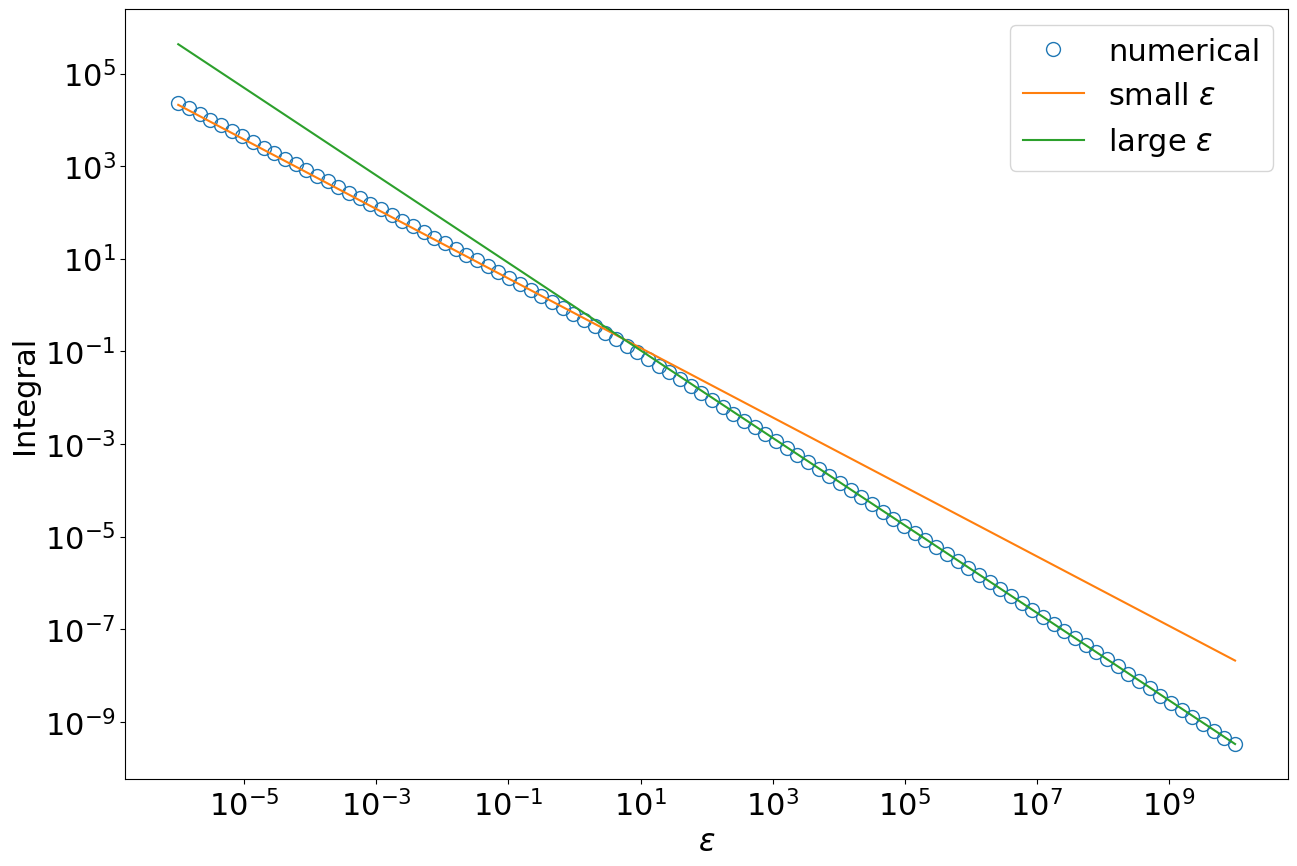

In [71]:
solve_simple_integral(7)

# Slightly Harder Simple Integrals